**Supporting Resources:**

[CS50’s Online Lecture @ Harvard](https://cs50.harvard.edu/x/2023/weeks/9/)

[Python Flask documentation](https://pypi.org/project/Flask/)

## Recap: Some Basics of Web

**HTTP:** a protocol (i.e. a set of rules) dictating how information is to be transmitted and processed via the internet. It specifies how a user requests a web page and, in response to that, how a server delivers that information back to the user.

**URL:** stands for Uniform Resource Locator. It addresses different resources on the internet (see the Lecture slides). A URL is an input from the user (Client-side) typed in their browser to visit the address specified by this URL. The browser then sends this input URL to the server hosting the website (Server-side) and the server brings the website to the user's browser (see the Lecture slides for further information). 

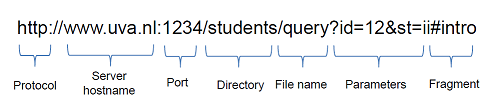

**Server:** software (Server-side) that receives requests from users (Client-side) about a website and sends responses back to them; in other words, websites are *hosted* by servers. When we talk about servers, we usually think of machines in which the server is run but a server is not a machine, it is the software. So far, we've built HTML pages but they are just files with .html extensions. How do people see it online? For that, you need to host your web pages with a web server which will communicate about your web pages with users out there.

**Static vs. Dynamic websites:** In this context, static and dynamic refer to how websites deliver and display content. If the content of a page is the same for every user and every request coming from the user, it is a static web page. Each page is a separate HTML file and a whole website is composed of a set of HTML files. What is displayed on a static page is manually (*hard*) coded in an HTML file and unless the code is edited manually per page, users will always see the same content. It also means that the content of every page should be coded in every single HMTL file even if the content is the same. For example, if there is the same menu button on every page, it should be coded in every HTML file one by one. Therefore, static websites are useful if:

- the content does not need to be updated frequently
- the content is the same for every user, regardless of any user request

On the other hand, dynamic pages contain content which is dynamically (i.e. "on-the-fly") selected and displayed by the server based on the user and requests. For example, you can choose which information is displayed to a user based on their location on a dynamic website. When a user goes to a web address (i.e. URL), the server will collect relevant pieces of information and put them together in a single web page, which will be displayed to that specific user. Therefore, dynamic websites enable customization for specific users and make changes to many pages much more convenient. 

So, dynamic websites are useful if:

- the content should be customized to the user
- the content needs to be updated frequently across different pages

Then the question is: How do we create dynamic websites? We have built HTML files so far, which can be just put together in a folder and served to users as a *static* website package. Then, the users will be navigated across different static HTML files with links, as we learned in the HTML notebook. For a dynamic website, you need to define the rules of serving a dynamic website per user and user request. It means that you are basically creating **your own server** for which you determine the rules of delivering web pages to the user, i.e. which pieces of information to collect, how and when to put them together and display to the user.

**Web Application:** a package of online actions. It is more than a website: it listens and responds to the user, interacts with databases, carries messages across the users, and does many other tasks. An online voting system, an online shop, and an online meeting platform are all web applications distributed over the internet. 

**Framework:** is not only a library but a bigger package including everything to create applications. Python Flask is a framework to create web applications in Python. ASP.Net, Express, Django, and React.js are a few other examples of web application frameworks. We are going to use Python's Flask in this course. 

## Python Flask

### Introduction

Remember that we haven't done any coding inside our HTML files. Interesting. Then, how can we add algorithms to run web applications?

Think about this verbal algorithm:

"**If** the user types https://www.google.com/ in their browser, **then** display the Google homepage (say "index.html"). **If** the user types https://www.google.com/maps in their browser, **then** display the maps page (say "maps.html")." How do we integrate this IF-ELSE algorithm in a server to be able to respond according to the user's request?

You can think of Flask as a tool to integrate Python code with HTML pages. For convenience, the Flask framework automizes Python functions for web processes. A web application created by Flask listens to the requests coming from the browser of its user and then fulfils these requests by running Python code in the background.

Using the Flask framework to serve a dynamic website has some requirements from us: an organized set of files and folders. The following is the list of folders and files we need to create in the **same directory**:

- **app.py**: a Python file in which our web application is stored
- **templates/**: a folder including all the HTML files
- **requirements.txt**: a text file including the list of libraries required by the web application to automatically install them
- **static/**: a folder including our static files, e.g. CSS and images.

Among the items in this list, the only thing you are not yet familiar with is the *app.py* file, i.e. web application. This is the brain of your server which handles all the info and coordinates the website workflow. Let's first understand its structure...

The following Python code is the simplest example for an *app.py* file: 

    from flask import Flask 

    app = Flask(__name__)    
    
    @app.route("/")
    def index():
        return "Hello, world!"
        
Let's look at this algorithm line by line:

1. `from flask import Flask`: imports *Flask* which is a function provided in the *flask* library. The role of the *Flask* function (be aware of the capital F) is to activate the complete Python code as a web application. 

2. `app = Flask(__name__)`: *Flask* function turns the file we are currently working on into an application. And here, we name this application variable `app`, as a convention. 

3. `@app.route("/")`: defines a route (i.e. path) for the *app* application. Remember that we are writing the brain (i.e. server) of the application. We need to define the response of the web application when specific requests come from the user's browser. In this case, this statement defines the route of the default web page (i.e homepage) because default pages have the URL ending only with a `/` sign (Remember the definition of routes from the lecture?). So, when the user types the default URL on their browser, the response of this server will be the following code...

4. `def index():`: is the function which will be activated by the routing of `/`. The function here is named `index` as a convention for the default `/` route. There is no input for the *index* function in this particular example. 

5. `return "Hello, world!"`": is the content of the `index` function in this example. It means that the default page of this website will display "Hello, world!" text to the user. 


What we do here is just return a hard-coded "Hello, world!" text as a response to the user. But, how do we display the HTML pages that we create using this application?

We need to use another fundamental *flask* function called `render_template`. We should import it from the *flask* library. When we call this function as a response of the server, it will look into the *templates* folder in the same directory. In that folder, it will search for a .html file specified as an input to the `render_template` function and then display it to the user as a response to the `/` route request. See the example below with the "index.html" template. In this case, "index.html" should be the content you want to display on your default page as its route is `/`.

    from flask import Flask, render_template

    app = Flask(__name__)    
    
    @app.route("/")
    def index():
        return render_template("index.html")

Notice that two lines are updated: the first line now includes the import of *render_template*, and the fifth line now returns the *render_template* function with a specified .html file to display in route `/`.

### Implementation

Let's continue learning by practising...

Flask comes with Anaconda which you installed in the previous semester. However, it is likely to be an older version. Start by updating Flask on your computer by running the following command in your terminal:

    pip install -U Flask

For the documentation of Flask, check [here](https://pypi.org/project/Flask/).

---

**Exercise 1:** 

Now, you will create your own simple server using Flask. 

**Step 1:** Create a folder in your local computer where you want to store your web application (this will be your directory). Let's name it *hello* (or whatever you want). 

**Step 2:** Create another folder inside *hello* folder, and name it *templates*. 

**Step 3:** Inside the *templates* folder, we need to collect all the HTML files that we want to use for this web application. In this exercise, let's use an HTML file that we created earlier in the previous notebooks. Move that HTML file into the *templates* folder and name it *index.html*. 

**Step 4:** Inside the *hello* folder, create a new Python file using Visual Studio Code (or Jupyter Lab) and name it *app.py*. Type the Python code we explained above.

Now, how do we actually run this application on our local device? 

**Step 5:** After creating the `app.py` file, go to your Terminal and navigate to its directory (in this case, the *hello* folder). Then, we need to run this Python file with the following command:

    flask run

**Step 6:** This command will execute/serve the `app.py` application on your local device. During the execution, you will see a URL returned on your Terminal. This is the address where your application is served. Notice that it is a local URL as you are serving it locally. Copy that URL to your browser and your application will display its response to you! It means that your .html file will be displayed on this URL.  

**Step 7:** Until you press CTRL + C in your terminal to stop serving the application, the application will be available on this URL. Once you stop serving it, the page will be unavailable. 

---

But we have already done that without Flask; what is the additional role of Flask here? 

What we just created is a static website which does not require Flask. Flask allows you to create dynamic web applications, meaning that depending on the user's input, the application will adapt itself and display specific content for that input. 

For example, you find Google's homepage at this address: https://www.google.com/. What happens when you search for something in Google; what does it return? If Google had to create separate HTML files for every possible search item of the user, well, no. Instead, Google is a dynamic website/web application which adapts its response according to the user inputs. When I search for "dogs" in Google, its URL becomes https://www.google.com/search?q=dogs. Remember the components of a URL? In this example, */search* is the route and *q=dogs* is the key-value pair which holds the user input (*dogs*).

To understand how this works, we need to learn another tool of Flask which will store the inputs sent by the user: the `request` object. 

**request object:** This object of Flask contains the data sent from the client-side (user) to the server-side. It has multiple attributes one of which is the `args` attribute. `request.args` is a dictionary containing arguments from the URL sent from the client-side. You are already familiar with the `get()` method of dictionaries which gets an item from the dictionary. If the key is not found, it returns a default value, NaN, to avoid a KeyError.

---

**Exercise 2:** 

Let's greet the user **with their name** after they enter their name on your homepage. For that, we want to have two HTML pages: (1) for collecting a user name and (2) for greeting this user with their name (e.g. "Hello, Gizem!").
 
**Step 1:** Create an HTML file including a form to collect their name from the user. (You've already practised with creating forms and submit buttons in HTML.) This will be your homepage and let's name it *index.html*. You can use the same Flask app you created above to serve this simple homepage. 

But we want to send the user to the second page (let's name it *greet.html*) once they submit their name with the form. How do we add this feature to the *index.html*? There are some important attributes we haven't covered yet.

An attribute of the `<form>` element is `action` which defines the action to be performed after the form is submitted. In our exercise here, we want users to go to the second page once they submit their names on the first page. So the `action` of the `form` element should specify the route of the second page to bring the user. 

Another important attribute is `method` which specifies the method of sending data collected with a form. There are two possible values for this attribute: "get" and "post". With the "get" method, data collected with the form will be added to the URL whereas "post" keeps it securely hidden in the HTTP request and does not add it to the URL. 

When you add these two attributes, your `form` element will look like this:

    <form action="/greet" method="get">
        <input type="text" name="first_name">
        <button type="submit"> Greet Me! </button>
    </form>

- When you open this HTML file now in your browser and submit your name, what happens? Check the URL!

**Step 2:** We need to create the second page named *greet.html* which should display "Hello, *name*!" message. What are we going to write in the place of *name*? We need the input from the homepage which is transferred through the URL (because we used the *get* method in the *index.html* form). How do we use it in *greet.html*? See my *greet.html* below:

    <!DOCTYPE html>
    <html lang="en">
        <head>
            <title>Hello!</title>
        </head>
        <body>
            Hello, {{ placeholder }}!
        </body>
    </html>

Notice the DOUBLE curly brackets around the variable called *placeholder*. This variable is going to be dynamically filled in by the Flask app. (Remember that the Flask app is the brain which orchestrates all the backend communication.) 

**Step 3:** We need to update the Flask app we created earlier. The instructions for the `/` route are still valid, right? In addition to that, we need to add instructions for the second route (`/greet`) because we now want to have two pages with two different routes. What do we need from Flask when it activates the second route? 

- We want Flask to look at the URL and collect the input data from the URL using `request.args.get()` because the URL now includes the user input as a key-value pair. 

- We want Flask to send this info as input to the *greet.html*.

See the new version of `app.py`:

    from flask import Flask, render_template, request

    app = Flask(__name__)    

    @app.route("/")
    def index():
        return render_template("index.html")

    @app.route("/greet", methods=["GET"])
    def greet():
        name = request.args.get("first_name")
        return render_template("greet.html", placeholder = name)


Notice the differences: (1) the first line now imports `request` from *flask*, (2) the second route `/greet` is defined, (3) methods to be used for this route is specified as "GET" (which is the default value, so we did not have to specify it here), (4) for `/greet`, a new function `greet` creates a new variable *name* which feeds into the `render_template` function as a value for the `placeholder` parameter. When *greet.html* is executed, it receives the *name* value in place of its `placeholder` parameter.   

**Step 4:** Let's run this web application in your terminal:

    flask run

**Note:** Do not forget to put all your HTML files in the *templates* folder.

---

We just created a dynamic website in Exercise 2. Frontend of the web pages are the same as a static web page, which we actually created earlier, but now, backend is dynamically coordinated by the Flask app. 

What if the information you collected from the user is private, like a password or credit card information? What if the user input is a very long text or an image? You would not want these data types to be displayed in the URL but you still need to pass this info through Flask. For that, we use the "post" method instead of "get". 

---

**Exercise 3:** 

Let's hide the name input from the URL...

**Step 1:** Update the form element's `method` attribute to "post" in *index.html*.

**Step 2:** Update the methods to be used in the `/greet` route in `app.py`. It is "GET" by default; now it should be specified as "POST". You also need to change the `request.args.get()` into `request.form.get()` just because... Your new `/greet` route definition will look like this:

    @app.route("/greet", methods=["POST"])
    def greet():
        name = request.form.get("first_name")
        return render_template("greet.html", placeholder = name)

**Step 3:** Run the new Flask app and see if it works and if your input name is shown in the URL.

---

We exercise with very very simple web pages. When you create your project websites or any other real-life web application you may build in the future, you will deal with much longer HTML pages. Then, the repetition of HTML lines will become a big burden and your coding design will not be pretty. Remember that we talked about *good coding principles* in the first semester. We can apply those principles to HTML pages as well. In fact, there are conventional ways to do that and you will definitely encounter those ways if you look at other people's web applications. 

---

**Exercise 4:**

Let's improve the coding design of our very simple HTML pages... *index.html* and *greet.html* share the same lines. Only their `body` sections are different. We can collect all the same lines in another HTML page, conventionally called *layout.html*. And the unique `body` sections will be the only component left in *index.html* and *greet.html*.

Also, let's add some styling to both pages using the external styling method. 

**Step 1:** Create a CSS file to define the same styling for the body of both pages. This file must be located in a folder called *static* in the *hello* directory. Now you have two folders in the same directory: *templates* and *static*. An example *style.css* file looks like this:

    body {
            background-color: orange;
            color: green; 
            text-align: center
    }

**Step 2:** Create a new HTML file called *layout.html* and save it in the *templates* folder. This HTML will collect all the fixed elements that you want to keep in all your web pages, for example, global styling, logos, icons, navigation menu, footers, etc. In our simple example, *layout.html* will look like this:

    <!DOCTYPE html>
    <html lang="en">
        <head>
            <title>Hello!</title>
            <link rel="stylesheet" href="/static/style.css">
        </head>
        <body>

            {% block unique_body %} {% endblock %}

        </body>
    </html>

Notice the fifth line linking to the CSS file.

The new line `{% block unique_body %} {% endblock %}` indicates the location of the unique lines. In this specific example, *unique_body* is the name I chose to identify the lines in *index.html* and *greet.html*. You can name it however you want but the other components of this line are fixed commands. 

**Step 3:** Update your *index.html* and *greet.html* by removing the lines included in the *layout.html* and keeping only the unique lines. 

*index.html* would look like this:

    {% extends "layout.html" %}

    {% block unique_body %} 

        <form action="/greet" method="post">
            <input type="text" name="first_name">
            <button type="submit"> Greet Me! </button>
        </form>

    {% endblock %}
    
    
*greet.html* would look like this:

    {% extends "layout.html" %}

    {% block unique_body %} 

        Hello, {{ placeholder }}!

    {% endblock %}    
    
    
Notice the new command `{% extends "layout.html" %}` which specifies the HTML page to be extended by the following blocks. In this example, we extend *layout.html* and we specify the location of extension in *layout.html*.

---


So far, we have collected inputs from the user but we haven't stored these inputs. Because we are able to connect any Python code with HTML thanks to Flask, we can actually record the input data in any Python data structure like a list, dictionary, and pandas DataFrame. 

The online lecture of CS50 covers this topic very effectively by implementing an example website that registers users for selected sports. Please watch the **chapter Frosh IMs** of that lecture which takes about 40 minutes (from about 55:00 till 1:33:00), and simultaneously implement the code on your own device. 

[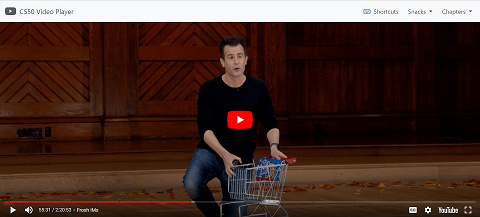](https://video.cs50.io/oVA0fD13NGI?start=3331)

As the Frosh IMs chapter concludes as well, data you store in a global variable in your Flask app will be deleted once Flask stops running. It stops running when you press CTRL + C in your Terminal or your computer shuts down because your application is served on your local computer. The solution for that is to store the data in a database. 

Database management is going to be one of our topics this semester. If you are interested to dive into that already, you can watch more instruction videos of CS50. See their Week 7 lecture about SQL (https://cs50.harvard.edu/x/2023/weeks/7/) and you can connect SQL with Flask in the chapters following Frosh IMs (https://cs50.harvard.edu/x/2023/weeks/9/). 

**Note:** 

Sometimes, rather than creating a database for a website, you might want to just display a dataset on your web page. One way of doing that with Flask is to convert a pandas DataFrame into an HTML table using the `to_html` method of DataFrames. Then, you can display the table on a web page by passing the table variable from `app.py` to the .html file as we did in Exercise 2. See pandas [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_html.html).